## Notebook to reproduce Fig. 2 in Section 2 

In [2]:
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt



def t_ad(R0,beta_exp,t):
    return (R0+beta_exp*const.c.cgs.value*t)/(beta_exp*const.c.cgs.value)

def t_cross(R0,beta_exp,t):
    return eval_R(R0,beta_exp,t)/const.c.cgs.value

def eval_R(R0,beta_exp,t):
    return R0+beta_exp*const.c.cgs.value*t

def eval_B(R0,beta_exp,B0,m_B,t):
    return B0*(R0/eval_R(R0,beta_exp,t))**m_B

def t_geom(R0,beta_exp,m_B,t):
    return t_ad(R0,beta_exp,t)/(m_B)

def t_synch(R0,beta_exp,B0,m_B,gamma,t):
    B=eval_B(R0,beta_exp,B0,m_B,t)
    return 3*(const.m_e.cgs.value*const.c.cgs.value)*8*np.pi/(4*const.sigma_T.cgs.value*B**2*gamma)

In [3]:


def time_scales_plot(ax,R01=1E15,R02=None,beta_exp=0.1,B01=0.01,B02=1,m_B=1.0,gamma1=10,gamma2=1000,t1=1,t2=1E10,add_legend=False,add_y_label=False,add_x_label=False,p=3,x_lim=None,y_lim=None):
   
    t=np.logspace(np.log10(t1),np.log10(t2),1000)
    x1=eval_R(R01,beta_exp,t)/R01
    
    msk=x1<1000
    x1=x1[msk]
    t=t[msk]
    y_max=t_ad(R01,beta_exp,t)/86400
    l=r'$t^{ad}_{\rm cooling}$'
    if R02 is not None:
        y_min=t_ad(R02,beta_exp,t)/86400
        x2=eval_R(R02,beta_exp,t)/R02
        ax.fill_between(x1,y_max ,y_min ,color='C00',alpha=0.3,label=l)
    else:
        y_min=None
        x2=None
        ax.plot(x1,y_max ,color='C00',alpha=1,label=l)
    #ax.plot(t,y_max ,color='b',alpha=0.3,label='adiabatic cooling')
    #ax.plot(t,y_min ,color='b',alpha=0.3,label='adiabatic cooling')

    
    
    y_max=t_cross(R01,beta_exp,t)/86400
    l=r'$t_{\rm cross}$'
    if R02 is not None:
        y_min=t_cross(R02,beta_exp,t)/86400
        ax.fill_between(x1,y_max ,y_min ,color='C02',alpha=0.3,label=l)
    else:
        y_min=None
        x2=None
        ax.plot(x1,y_max ,color='C02',alpha=1,label=l)
    
    
    c=['C01','C03','C03']
    for ID,g in enumerate([gamma1,gamma2]):
        y_max=t_synch(R01,beta_exp,B01,m_B,g,t)/86400
        l=r'$t^{synch}_{\rm cooling}, \gamma=%1.0f$'%g
        if R02 is not None:
            y_min=t_synch(R02,beta_exp,B02,m_B,g,t)/86400
            ax.fill_between(x1,y_max ,y_min ,color=c[ID],alpha=0.3,label=l)
        else:
            y_min=t_synch(R01,beta_exp,B02,m_B,g,t)/86400
            x2=None
            ax.fill_between(x1,y_max ,y_min ,color=c[ID],alpha=0.3,label=l)

    
   
    
    
    

    if add_x_label is True:
        ax.set_xlabel(' $R(t)/R_0$')
      
    #ax.set_xlabel(' $t$  (s)')
    if add_y_label is True:
        ax.set_ylabel(' $t$  (d)')
    if add_legend is True:
        ax.legend(loc='upper left',fontsize=10,ncol=2,labelspacing=0.05,handlelength=1,columnspacing=0.5,frameon=False)
    #ax.set_boxstyle(r'$R_0=%d \times 10^{%d}$ cm , $m_B$=%2.1f'%(R01/(10**(np.int(np.log10(R01)))),np.log10(R01),m_B),{'fontsize': 9}, pad=0.6)
    
    ax.annotate(r'$R_0=%d \times 10^{%d}$ cm, $m_B$=%2.1f, $\beta_{\rm exp}=10^{%1.1f}$'%(R01/(10**(np.int(np.log10(R01)))),np.log10(R01),m_B,np.log10(beta_exp)),
            xy=(1, 0), xycoords='axes fraction',
            xytext=(-25, 0), textcoords='offset pixels',
            horizontalalignment='right',
            verticalalignment='bottom',
            fontsize=10)
    ax.loglog()
    
    ax1 = ax.twiny()
    ax1.loglog()
    x_nu=np.logspace(-6,0,7)
    conv_exp=((m_B*(p+2)+4)/(p+4) )
    x_R=1.0/(x_nu**(1.0/conv_exp))
   
    x_new=(x_R**conv_exp)

    ax1.set_xbound(ax.get_xbound())
    ax1.set_xticks(x_R)
    
   

    
    ax1.set_xticklabels([r'$10^{%d}$'%(np.log10(i)) for i in x_nu])
    ax1.minorticks_off()
    ax1.set_xlabel(r'$\nu_{SSA}(t)/\nu_{SSA}(0)$')
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    return ax

<ipython-input-115-a169c2945525>:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


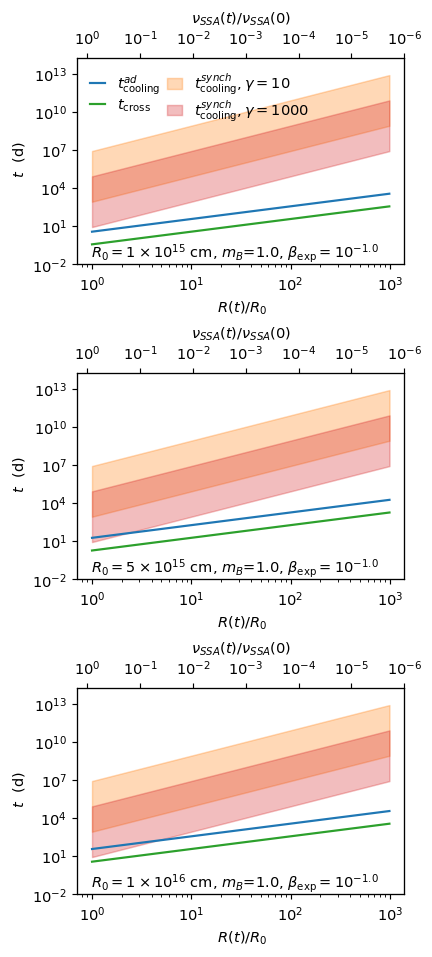

In [115]:
beta_exp=0.1
fig = plt.figure(constrained_layout=True,dpi=105,figsize=(4, 9))
gs = fig.add_gridspec(nrows=3, ncols=1,wspace=-1, hspace=-1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex = ax1)
ax3 = fig.add_subplot(gs[2], sharex = ax2)

time_scales_plot(ax1,beta_exp=beta_exp,R01=1E15,m_B=1.0,add_legend=True,add_y_label=True,add_x_label=True,y_lim=[.01,2E14])
time_scales_plot(ax2,beta_exp=beta_exp,R01=5E15,m_B=1.0,add_x_label=True,add_y_label=True,y_lim=[.01,2E14])
time_scales_plot(ax3,beta_exp=beta_exp,R01=1E16,m_B=1.0,add_x_label=True,add_y_label=True,y_lim=[.01,2E14])
plt.tight_layout()

In [116]:
fig.savefig('time_scales/t_scales_1.pdf',bbox_inches = 'tight',
    pad_inches = 0)

<AxesSubplot:xlabel=' $R(t)/R_0$', ylabel=' $t$  (d)'>

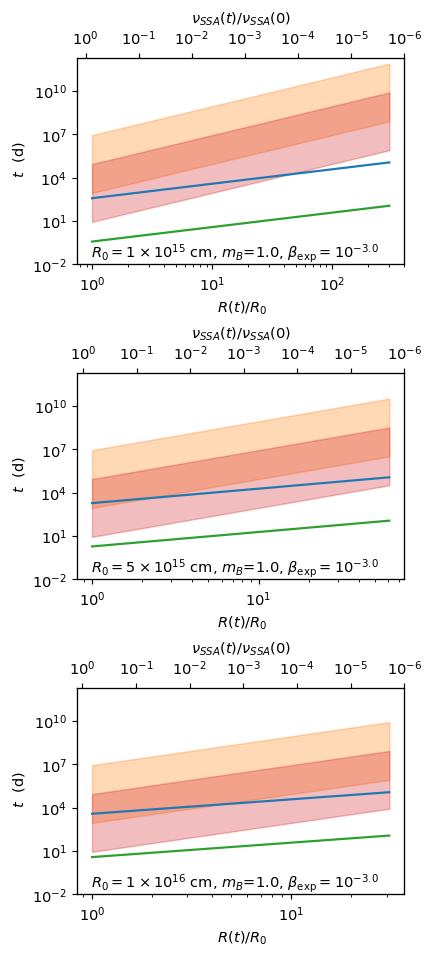

In [117]:
beta_exp=0.001

fig = plt.figure(constrained_layout=True,dpi=105,figsize=(4, 9))
gs = fig.add_gridspec(nrows=3, ncols=1,wspace=-1, hspace=-1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])


time_scales_plot(ax1,beta_exp=beta_exp,R01=1E15,m_B=1,add_legend=False,add_y_label=True,add_x_label=True,y_lim=[.01,2E12])
time_scales_plot(ax2,beta_exp=beta_exp,R01=5E15,m_B=1,add_x_label=True,add_y_label=True,y_lim=[.01,2E12])
time_scales_plot(ax3,beta_exp=beta_exp,R01=1E16,m_B=1,add_x_label=True,add_y_label=True,y_lim=[.01,2E12])

In [118]:
fig.savefig('time_scales/t_scales_2.pdf',bbox_inches = 'tight',
    pad_inches = 0)

<ipython-input-4-3822e2fb6676>:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


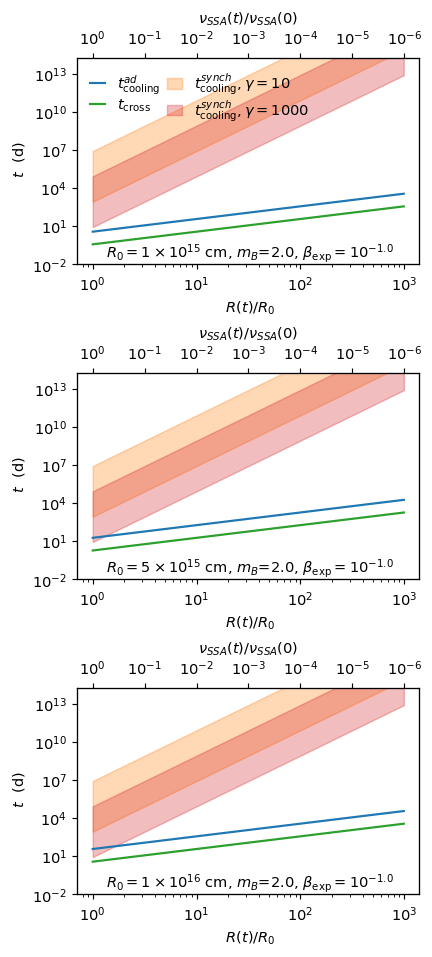

In [4]:
beta_exp=0.1
fig = plt.figure(constrained_layout=True,dpi=105,figsize=(4, 9))
gs = fig.add_gridspec(nrows=3, ncols=1,wspace=-1, hspace=-1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex = ax1)
ax3 = fig.add_subplot(gs[2], sharex = ax2)

time_scales_plot(ax1,beta_exp=beta_exp,R01=1E15,m_B=2.0,add_legend=True,add_y_label=True,add_x_label=True,y_lim=[.01,2E14])
time_scales_plot(ax2,beta_exp=beta_exp,R01=5E15,m_B=2.0,add_x_label=True,add_y_label=True,y_lim=[.01,2E14])
time_scales_plot(ax3,beta_exp=beta_exp,R01=1E16,m_B=2.0,add_x_label=True,add_y_label=True,y_lim=[.01,2E14])
plt.tight_layout()

<AxesSubplot:xlabel=' $R(t)/R_0$', ylabel=' $t$  (d)'>

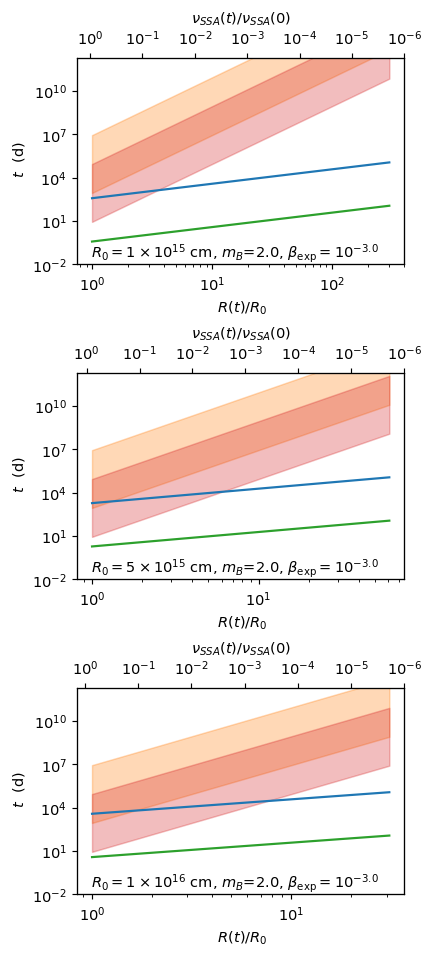

In [6]:
beta_exp=0.001

fig = plt.figure(constrained_layout=True,dpi=105,figsize=(4, 9))
gs = fig.add_gridspec(nrows=3, ncols=1,wspace=-1, hspace=-1)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])


time_scales_plot(ax1,beta_exp=beta_exp,R01=1E15,m_B=2,add_legend=False,add_y_label=True,add_x_label=True,y_lim=[.01,2E12])
time_scales_plot(ax2,beta_exp=beta_exp,R01=5E15,m_B=2,add_x_label=True,add_y_label=True,y_lim=[.01,2E12])
time_scales_plot(ax3,beta_exp=beta_exp,R01=1E16,m_B=2,add_x_label=True,add_y_label=True,y_lim=[.01,2E12])